# SKIN CANCER CLASSIFIER

In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.io import imread
from skimage.color import rgb2grey
from sklearn.feature_extraction import image
from sklearn.cluster import KMeans
from skimage.filters import rank, threshold_otsu
from skimage.morphology import closing, square, disk
from skimage import exposure as hist, data, img_as_float
from skimage.segmentation import chan_vese
from skimage.feature import canny
from skimage.color import rgb2gray
from scipy import ndimage as ndi 

In [2]:
mal_images = glob('./data/train/malignant/*')
ben_images = glob('./data/train/benign/*')
#Test
mal_images_test = glob('./data/test/malignant/*')
ben_images_test = glob('./data/test/benign/*')

In [3]:
len(mal_images)

1197

In [4]:
len(ben_images)

1440

In [5]:
mal_images_1 = glob('./data/train/malignant/*')[:5]
ben_images_1 = glob('./data/train/benign/*')[:5]

In [6]:
mal_images

['./data/train/malignant/63.jpg',
 './data/train/malignant/823.jpg',
 './data/train/malignant/1409.jpg',
 './data/train/malignant/189.jpg',
 './data/train/malignant/77.jpg',
 './data/train/malignant/837.jpg',
 './data/train/malignant/1353.jpg',
 './data/train/malignant/1435.jpg',
 './data/train/malignant/1421.jpg',
 './data/train/malignant/1390.jpg',
 './data/train/malignant/604.jpg',
 './data/train/malignant/162.jpg',
 './data/train/malignant/176.jpg',
 './data/train/malignant/88.jpg',
 './data/train/malignant/610.jpg',
 './data/train/malignant/1384.jpg',
 './data/train/malignant/1179.jpg',
 './data/train/malignant/1145.jpg',
 './data/train/malignant/406.jpg',
 './data/train/malignant/1192.jpg',
 './data/train/malignant/412.jpg',
 './data/train/malignant/374.jpg',
 './data/train/malignant/599.jpg',
 './data/train/malignant/1025.jpg',
 './data/train/malignant/1031.jpg',
 './data/train/malignant/228.jpg',
 './data/train/malignant/214.jpg',
 './data/train/malignant/566.jpg',
 './data/tra

In [7]:
#https://www.unioviedo.es/compnum/labs/PYTHON/intro_image.html

def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(imread(path))
    return tmp
    
    
def plot_any(arr, title = ''):
    plt.figure(figsize = (15, 25))
    for i in range(len(arr)):
        plt.subplot(1,len(arr),i + 1)
        plt.title(title)
        plt.imshow(arr[i]);
        
        
def d2Kmeans(img, k):
    return KMeans(n_jobs=-1, 
                  random_state=1, 
                  n_clusters = k, 
                  init='k-means++'
    ).fit(img.reshape((-1,1))).labels_.reshape(img.shape)


def mean_filter(image, raio_disk):
    return rank.mean_percentile(image, selem = disk(raio_disk))


def binary(image):
    return image > threshold_otsu(image)

In [8]:
#data train
mal = load_images(mal_images)
ben = load_images(ben_images)

#data test
mal_test = load_images(mal_images_test)
ben_test = load_images(ben_images_test)

mal_1 = load_images(mal_images_1)
ben_1 = load_images(ben_images_1)

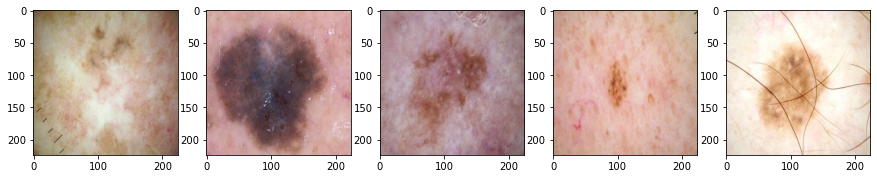

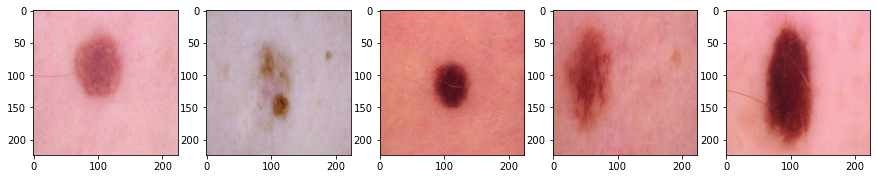

In [9]:
plot_any(mal_1)
plot_any(ben_1)

In [10]:
img_selected = mal[1]

In [11]:
len(img_selected[0][0])

3

In [12]:
len(mal)

1197

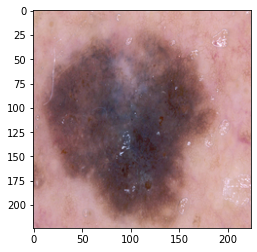

In [13]:
plt.imshow(img_selected,cmap='hot')

In [53]:
import numpy as np 
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline


In [45]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.imshow(img, cmap = plt.cm.gray)
    ax.set_axis_off()
    plt.show()

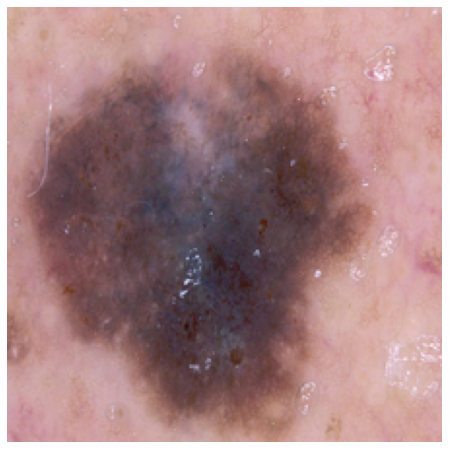

In [57]:
img = skic.rgb2gray(skid.astronaut())

#show(img)
show(img_selected)



In [47]:
#sobimg = skif.sobel(img_selected)
#show(sobimg)

#len(img_selected)
img_selected.shape

(224, 224, 3)

In [54]:
img_selected1 = flatten_all(img_selected)

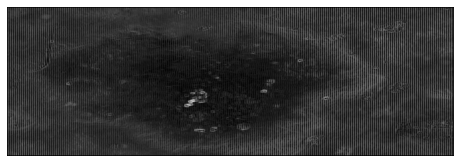

In [59]:
sobimg = skif.sobel(img_selected1)
show(sobimg)

In [130]:
def conservative_smoothing_gray(data, filter_size):
    temp = []
    
    indexer = filter_size // 2
    
    new_image = data.copy()
    
    nrow, ncol = data.shape
    
    for i in range(nrow):
        
        for j in range(ncol):
            
            for k in range(i-indexer, i+indexer+1):
                
                for m in range(j-indexer, j+indexer+1):
                    
                    if (k > -1) and (k < nrow):
                        
                        if (m > -1) and (m < ncol):
                            
                            temp.append(data[k,m])
                            
            temp.remove(data[i,j])
            
            
            max_value = max(temp)
            
            min_value = min(temp)
            
            if data[i,j] > max_value:
                
                new_image[i,j] = max_value
            
            elif data[i,j] < min_value:
                
                new_image[i,j] = min_value
            
            temp =[]
    
    return new_image.copy()

In [133]:
#les images filtrées
def filtrer_image(img_array):
    array_filter = []
    taille = len(img_array)
    for i in range(taille):
        img_ar = flatten_all(img_array[i])
        sob_img = conservative_smoothing_gray(img_ar, 5)
        array_filter.append(sob_img)
    return array_filter

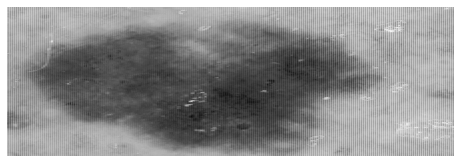

In [134]:
image2 = img_selected1
new_image = conservative_smoothing_gray(image2,5)
show(new_image)

In [ ]:
mal_f = filtrer_image(mal)

ben_f = filtrer_image(ben)

In [ ]:
mal_test_f = filtrer_image(mal_test)
ben_test_f = filtrer_image(ben_test)

In [104]:
#for i in range(len(mal_1f)):
 #   show(mal_1f[i])

In [ ]:
#Train
mal_arr = np.array(mal_f)
ben_arr = np.array(ben_f)

mal_arr_test = np.array(mal_test_f)
ben_arr_test = np.array(ben_test_f)

len(mal_arr_test)

In [ ]:
#On creer les array labels 1 pour mal et 0 pour ben : (ben La bénignité est une condition inoffensive à long terme)
#Data train
target_mal = np.ones(len(mal_arr))       #1 pour malign
target_ben = np.ones(len(ben_arr)) - 1    #0 pour benign


#Data test
target_mal_test = np.ones(len(mal_arr_test))       #1 pour malign
target_ben_test = np.ones(len(ben_arr_test)) - 1    #0 pour benign


In [ ]:
#Data train
X_train = np.concatenate((mal_arr,ben_arr),axis=0)
y_train = np.concatenate((target_mal,target_ben),axis=0)

#Data test
X_test = np.concatenate((mal_arr_test,ben_arr_test),axis=0)
y_test = np.concatenate((target_mal_test,target_ben_test),axis=0)

In [ ]:
len(X_train)

In [ ]:
X_train.shape

In [ ]:
len(y_train)

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape


# Training

<b>1 - Using SVM without filter</b>

In [114]:
from PIL import Image
test =  Image.open("2.jpg")
test = test.resize((28, 28))
test = np.array(test)
test = test.flatten()

In [115]:
test

array([38, 44, 51, ..., 27, 29, 26], dtype=uint8)

In [116]:
targ = np.array(1)

In [117]:
def flatten_all(features):
    imgs = []
    for i in features:
        imgs.append(i.flatten())
    return np.array(imgs)
        

In [118]:
imgs = flatten_all(X_train)

In [119]:
imgs

array([[0.33771354, 0.33445413, 0.33167066, ..., 0.2938692 , 0.2897909 ,
        0.28579817],
       [0.77574154, 0.76612091, 0.75659842, ..., 0.66587256, 0.65901065,
        0.65214333],
       [0.61348542, 0.61026215, 0.6073427 , ..., 0.39613078, 0.39456288,
        0.39298642],
       ...,
       [0.78835853, 0.76735597, 0.74714059, ..., 0.55589795, 0.5457176 ,
        0.53550576],
       [0.12701204, 0.13158498, 0.13703166, ..., 0.07370326, 0.07428524,
        0.07497882],
       [0.73240934, 0.71656874, 0.70118709, ..., 0.62833525, 0.62400272,
        0.61967192]])

In [120]:
#Import svm model
from sklearn import svm

#SVM classifier
clf = svm.SVC(kernel='linear') #kernel linear

#Training
clf.fit(imgs,y_train)

SVC(kernel='linear')

In [121]:
imgs_test = flatten_all(X_test)

In [122]:
y_pred = clf.predict(imgs_test)

In [123]:
#Calcul de la precision
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred) )

Accuracy: 0.7242424242424242


In [124]:
#Pourcentage de tuples positifs est étiqueté comme tel
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.7092198581560284


In [125]:
# Model Recall: Pourcentage de tuples positifs est étiqueté comme tel
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.6666666666666666


In [92]:
metrics.confusion_matrix(y_test, y_pred)

array([[301,  59],
       [ 92, 208]])

<b>2 -Random forest algorithm without filter</b>

In [ ]:
#Import random forest classifier
from sklearn.ensemble import RandomForestClassifier

#training random Forest
rf_model=RandomForestClassifier(n_estimators=100)
#Fit
rf_model.fit(imgs,y_train)

In [ ]:
y_rf_pred = rf_model.predict(imgs_test)

In [ ]:
#Calcul de la precision
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_rf_pred) )

In [96]:
#Pourcentage de tuples positifs est étiqueté comme tel
print("Precision:",metrics.precision_score(y_test, y_rf_pred))

Precision: 0.7642045454545454


In [97]:
# Model Recall: Pourcentage de tuples positifs est étiqueté comme tel
print("Recall:",metrics.recall_score(y_test, y_rf_pred))

Recall: 0.8966666666666666


<b>KNN without filter</b>

In [126]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier ( n_neighbors =5)
model_knn.fit(imgs,y_train)

KNeighborsClassifier()

In [127]:
y_knn_pred = model_knn.predict(imgs_test)

In [128]:
#Calcul de la precision
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_knn_pred) )

Accuracy: 0.6909090909090909


In [49]:
img_selected1.shape

(224, 672)

In [51]:
from ipywidgets import widgets

@widgets.interact(x=(0.01, .2, .005))
def edge(x):
    show(sobimg < x)

interactive(children=(FloatSlider(value=0.105, description='x', max=0.2, min=0.01, step=0.005), Output()), _do…

In [52]:
from skimage import data, filter

smooth = filter.gaussian_filter(img_selected,5)
plt.imshow(smooth)


ImportError: cannot import name 'filter' from 'skimage' (/opt/anaconda3/lib/python3.8/site-packages/skimage/__init__.py)

In [ ]:
#les images filtrées